In [247]:
#Linear Regression from Scratch

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [249]:
data = pd.read_csv('student.csv')

In [250]:
print(data.head(2))

   Math  Reading  Writing
0    48       68       63
1    62       81       72


In [251]:
print(data.tail(2))

     Math  Reading  Writing
998    83       82       78
999    66       66       72


In [252]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None


In [253]:
print(data.describe())

              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60.750000    58.000000
50%      68.000000    70.000000    69.500000
75%      78.000000    81.000000    79.000000
max     100.000000   100.000000   100.000000


In [254]:
X = data[['Math', 'Reading']]
Y = data['Writing']

In [255]:
X.shape

(1000, 2)

In [256]:
Y.shape

(1000,)

In [257]:
Y_matrix = Y.values.reshape(-1, 1)

In [258]:
# Create matrices without bias/intercept
# Note: We assume no bias term (w0 = 0)

# Convert X to numpy array and transpose it
# X should be (d x n) where d = features, n = samples
# Y should be (n x 1)

X_matrix = X.values.T
Y_matrix = Y.values.reshape(-1, 1) #Making column vector

In [259]:
# Initialize weight matrix W (d x 1)
# d = number of features = 2 (Math and Reading)

W_matrix = np.zeros((X_matrix.shape[0], 1))

In [260]:
print(f"X matrix shape: {X_matrix.shape}")
print(f"Y matrix shape: {Y_matrix.shape}")
print(f"W matrix shape: {W_matrix.shape}")

X matrix shape: (2, 1000)
Y matrix shape: (1000, 1)
W matrix shape: (2, 1)


In [261]:
print(W_matrix)

[[0.]
 [0.]]


In [262]:
from sklearn.model_selection import train_test_split

In [263]:
X_split = X_matrix.T
Y_split = Y_matrix

In [264]:
X_train, X_test, Y_train, Y_test = train_test_split(X_split, Y_split, test_size=0.2, random_state=42)

In [265]:
X_train = X_train.T
X_test = X_test.T

In [266]:
# To-Do 4: Mean Squared Error Cost Function
def cost_function(X, Y, W):

    """
    Calculate Mean Squared Error (MSE)

    Parameters:
    X: Feature matrix (d x n)
    Y: Target vector (n x 1)
    W: Weight matrix (d x 1)

    Returns:
    cost: Mean Squared Error
    """

    n = Y.shape[0]  # Number of samples

    # Calculate predictions: Y_pred = W^T * X
    # W shape: (d, 1), X shape: (d, n) -> W.T shape: (1, d)
    # W.T @ X shape: (1, n) -> transpose to (n, 1)

    Y_pred = (W.T @ X).T

    # Calculate errors
    errors = Y_pred - Y

    # Calculate MSE = (1/(2*n)) * sum(errors^2)
    cost = (1/(2*n)) * np.sum(errors**2)

    return cost

# Test with our data
initial_cost = cost_function(X_train, Y_train, W_matrix)
print(f"Initial cost (with weights = 0): {initial_cost}")

Initial cost (with weights = 0): 2471.69875


In [267]:
# To-Do 5: Test the cost function with given example
# Given test case from PDF:

X_test_case = np.array([[1, 2], [3, 4], [5, 6]]).T
Y_test_case = np.array([3, 7, 11]).reshape(-1, 1)
W_test_case = np.array([1, 1]).reshape(-1, 1)

print(" Testing Cost Function ")
print(f"X_test_case shape: {X_test_case.shape}")
print(f"Y_test_case shape: {Y_test_case.shape}")
print(f"W_test_case shape: {W_test_case.shape}")

cost = cost_function(X_test_case, Y_test_case, W_test_case)
print(f"\nCalculated cost: {cost}")

if cost == 0:
    print("Proceed Further ✓")
else:
    print("Something went wrong: Reimplement a cost function ✗")

 Testing Cost Function 
X_test_case shape: (2, 3)
Y_test_case shape: (3, 1)
W_test_case shape: (2, 1)

Calculated cost: 0.0
Proceed Further ✓


In [268]:
# To-Do 6: Gradient Descent
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Perform gradient descent to optimize weights

    Parameters:
    X: Feature matrix (d x n)
    Y: Target vector (n x 1)
    W: Initial weight matrix (d x 1)
    alpha: Learning rate
    iterations: Number of iterations

    Returns:
    W_updated: Optimized weights
    cost_history: List of costs at each iteration
    """
    m = Y.shape[0]
    cost_history = []
    W_updated = W.copy()  # Don't modify original W

    for i in range(iterations):
        # Step 1: Calculate predictions Y_pred = W^T * X
        Y_pred = (W_updated.T @ X).T

        # Step 2: Calculate error/loss
        loss = Y_pred - Y

        # Step 3: Calculate gradient
        # Gradient = (1/m) * X * loss
        # X shape: (d, n), loss shape: (n, 1)

        gradient = (1/m) * (X @ loss)  # Shape (d, 1)

        # Step 4: Update weights
        W_updated = W_updated - alpha * gradient

        # Step 5: Calculate and store cost
        current_cost = cost_function(X, Y, W_updated)
        cost_history.append(current_cost)

        # Optional: Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {current_cost}")

    return W_updated, cost_history

In [269]:
# To-Do 7: Test Gradient Descent with random data
print(" Testing Gradient Descent ")
np.random.seed(0)  # For reproducibility

# Generate random test data
X_random = np.random.rand(100, 3).T  # 3 features, 100 samples -> (3, 100)
Y_random = np.random.rand(100, 1)     # (100, 1)
W_initial = np.random.rand(3, 1)      # (3, 1)

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Run gradient descent
print("Running gradient descent...")
W_final, cost_history = gradient_descent(X_random, Y_random, W_initial, alpha, iterations)

print(f"\nFinal parameters shape: {W_final.shape}")
print(f"Final cost: {cost_history[-1]}")
print(f"Cost reduced from {cost_history[0]} to {cost_history[-1]}")

 Testing Gradient Descent 
Running gradient descent...
Iteration 0: Cost = 0.10711197094660153
Iteration 100: Cost = 0.06937115135926715
Iteration 200: Cost = 0.061391150058046254
Iteration 300: Cost = 0.05900207408061755
Iteration 400: Cost = 0.05778231789585793
Iteration 500: Cost = 0.05690326144474244
Iteration 600: Cost = 0.05619326328247578
Iteration 700: Cost = 0.055603536025805575
Iteration 800: Cost = 0.05511052337298953
Iteration 900: Cost = 0.05469767975221677

Final parameters shape: (3, 1)
Final cost: 0.05435492255484332
Cost reduced from 0.10711197094660153 to 0.05435492255484332


In [270]:
# To-Do 8: Root Mean Squared Error

def rmse(Y, Y_pred):

    """
    Calculate Root Mean Squared Error

    Parameters:
    Y: Actual values (n x 1)
    Y_pred: Predicted values (n x 1)

    Returns:
    rmse_value: Root Mean Squared Error
    """
    n = Y.shape[0]

    # RMSE = sqrt(mean((Y - Y_pred)^2))

    mse = np.mean((Y - Y_pred) ** 2)
    rmse_value = np.sqrt(mse)

    return rmse_value

# Test RMSE
print(" Testing RMSE ")
Y_test_example = np.array([3, 7, 11]).reshape(-1, 1)
Y_pred_example = np.array([3.1, 6.9, 11.2]).reshape(-1, 1)
rmse_value = rmse(Y_test_example, Y_pred_example)
print(f"RMSE: {rmse_value}")

 Testing RMSE 
RMSE: 0.14142135623730911


In [271]:
# To-Do 9: R-squared (Coefficient of Determination)

def r2(Y, Y_pred):
    """
    Calculate R-squared score

    Parameters:
    Y: Actual values (n x 1)
    Y_pred: Predicted values (n x 1)

    Returns:
    r2_value: R-squared score
    """
    # Calculate mean of Y
    mean_y = np.mean(Y)

    # SS_res = sum of squared residuals
    ss_res = np.sum((Y - Y_pred) ** 2)

    # SS_tot = total sum of squares
    ss_tot = np.sum((Y - mean_y) ** 2)

    # R² = 1 - (SS_res / SS_tot)
    r2_value = 1 - (ss_res / ss_tot)

    return r2_value

# Test R²
print(" Testing R² ")
r2_value = r2(Y_test_example, Y_pred_example)
print(f"R² score: {r2_value}")

 Testing R² 
R² score: 0.998125


Running main function...
=== Linear Regression from Scratch ===

Training on 800 samples...
Learning rate: 0.0001, Iterations: 1000
Iteration 0: Cost = 17.813797177522098
Iteration 100: Cost = 13.120988186895222
Iteration 200: Cost = 11.466901996763024
Iteration 300: Cost = 10.76897527049408
Iteration 400: Cost = 10.47449139284224
Iteration 500: Cost = 10.350236580792751
Iteration 600: Cost = 10.29780838526448
Iteration 700: Cost = 10.27568678175462
Iteration 800: Cost = 10.266352770982051
Iteration 900: Cost = 10.262414369452358

--------------------------------------------------
RESULTS
--------------------------------------------------

Optimal Weights:
Math weight (w1): 0.089493
Reading weight (w2): 0.895049

Training Set:
  RMSE: 4.5301
  R²: 0.9098

Test Set:
  RMSE: 4.7926
  R²: 0.9082

Cost reduced from 17.8138 to 10.2608


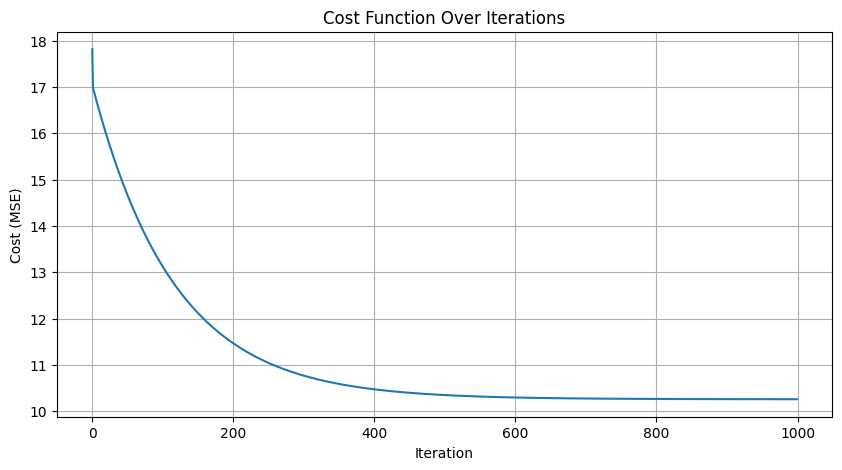

In [272]:
# To-Do 10: Main function that integrates everything
def main():
    print("=== Linear Regression from Scratch ===\n")

    # Step 1: Load and prepare data (already done in previous cells)
    # We'll reuse X_train, X_test, Y_train, Y_test from To-Do 3

    # Step 2: Initialize weights (zeros)
    W_initial = np.zeros((X_train.shape[0], 1))

    # Step 3: Set hyperparameters
    alpha = 0.0001  # Learning rate (small for our data)
    iterations = 1000

    print(f"Training on {X_train.shape[1]} samples...")
    print(f"Learning rate: {alpha}, Iterations: {iterations}")

    # Step 4: Train model using gradient descent
    W_optimal, cost_history = gradient_descent(
        X_train, Y_train, W_initial, alpha, iterations
    )

    # Step 5: Make predictions on test set
    # Y_pred = W^T * X_test
    Y_pred_test = (W_optimal.T @ X_test).T

    # Step 6: Evaluate model
    test_rmse = rmse(Y_test, Y_pred_test)
    test_r2 = r2(Y_test, Y_pred_test)

    # Also evaluate on training set
    Y_pred_train = (W_optimal.T @ X_train).T
    train_rmse = rmse(Y_train, Y_pred_train)
    train_r2 = r2(Y_train, Y_pred_train)

    # Step 7: Output results
    print("\n" + "-"*50)
    print("RESULTS")
    print("-"*50)
    print(f"\nOptimal Weights:")
    print(f"Math weight (w1): {W_optimal[0, 0]:.6f}")
    print(f"Reading weight (w2): {W_optimal[1, 0]:.6f}")

    print(f"\nTraining Set:")
    print(f"  RMSE: {train_rmse:.4f}")
    print(f"  R²: {train_r2:.4f}")

    print(f"\nTest Set:")
    print(f"  RMSE: {test_rmse:.4f}")
    print(f"  R²: {test_r2:.4f}")

    print(f"\nCost reduced from {cost_history[0]:.4f} to {cost_history[-1]:.4f}")

    # Plot cost history
    plt.figure(figsize=(10, 5))
    plt.plot(cost_history)
    plt.title('Cost Function Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)
    plt.show()

    return W_optimal, cost_history

# Run the main function
print("Running main function...")
W_final, history = main()

Running main function...
 Linear Regression from Scratch 

Training on 800 samples...
Learning rate: 0.0001, Iterations: 1000
Iteration 0: Cost = 17.813797177522098
Iteration 100: Cost = 13.120988186895222
Iteration 200: Cost = 11.466901996763024
Iteration 300: Cost = 10.76897527049408
Iteration 400: Cost = 10.47449139284224
Iteration 500: Cost = 10.350236580792751
Iteration 600: Cost = 10.29780838526448
Iteration 700: Cost = 10.27568678175462
Iteration 800: Cost = 10.266352770982051
Iteration 900: Cost = 10.262414369452358

--------------------------------------------------
RESULTS
--------------------------------------------------

Optimal Weights:
Math weight (w1): 0.089493
Reading weight (w2): 0.895049

Training Set:
  RMSE: 4.5301
  R²: 0.9098

Test Set:
  RMSE: 4.7926
  R²: 0.9082

Cost reduced from 17.8138 to 10.2608


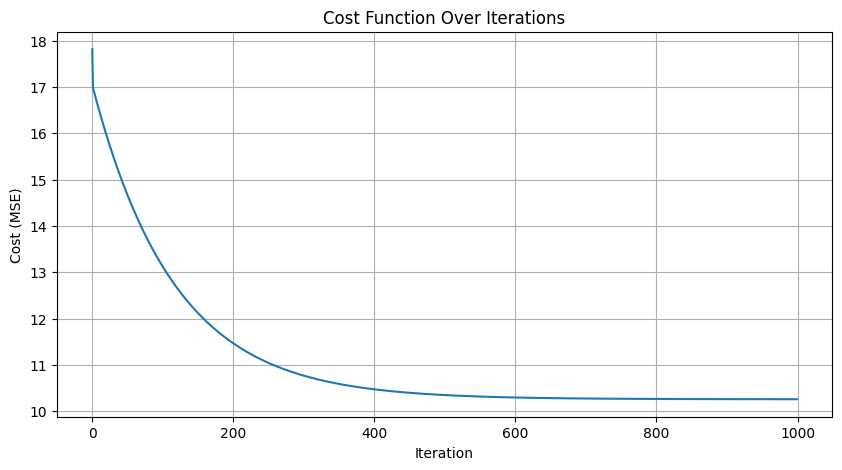

In [273]:
# To-Do 10: Main function that integrates everything
def main():
    print(" Linear Regression from Scratch \n")

    # Step 1: Load and prepare data (already done in previous cells)
    # We'll reuse X_train, X_test, Y_train, Y_test from To-Do 3

    # Step 2: Initialize weights (zeros)
    W_initial = np.zeros((X_train.shape[0], 1))

    # Step 3: Set hyperparameters
    alpha = 0.0001  # Learning rate (small for our data)
    iterations = 1000

    print(f"Training on {X_train.shape[1]} samples...")
    print(f"Learning rate: {alpha}, Iterations: {iterations}")

    # Step 4: Train model using gradient descent
    W_optimal, cost_history = gradient_descent(
        X_train, Y_train, W_initial, alpha, iterations
    )

    # Step 5: Make predictions on test set
    # Y_pred = W^T * X_test
    Y_pred_test = (W_optimal.T @ X_test).T

    # Step 6: Evaluate model
    test_rmse = rmse(Y_test, Y_pred_test)
    test_r2 = r2(Y_test, Y_pred_test)

    # Also evaluate on training set
    Y_pred_train = (W_optimal.T @ X_train).T
    train_rmse = rmse(Y_train, Y_pred_train)
    train_r2 = r2(Y_train, Y_pred_train)

    # Step 7: Output results
    print("\n" + "-"*50)
    print("RESULTS")
    print("-"*50)
    print(f"\nOptimal Weights:")
    print(f"Math weight (w1): {W_optimal[0, 0]:.6f}")
    print(f"Reading weight (w2): {W_optimal[1, 0]:.6f}")

    print(f"\nTraining Set:")
    print(f"  RMSE: {train_rmse:.4f}")
    print(f"  R²: {train_r2:.4f}")

    print(f"\nTest Set:")
    print(f"  RMSE: {test_rmse:.4f}")
    print(f"  R²: {test_r2:.4f}")

    print(f"\nCost reduced from {cost_history[0]:.4f} to {cost_history[-1]:.4f}")

    # Plot cost history
    plt.figure(figsize=(10, 5))
    plt.plot(cost_history)
    plt.title('Cost Function Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)
    plt.show()

    return W_optimal, cost_history

# Run the main function
print("Running main function...")
W_final, history = main()

 Experimenting with Learning Rates 


Learning rate: 1e-05
Iteration 0: Cost = 2013.165570783755
Iteration 100: Cost = 16.53009054783484
Iteration 200: Cost = 16.01265915991194
Iteration 300: Cost = 15.537926773367479
Iteration 400: Cost = 15.102368062496216
Iteration 500: Cost = 14.702750517974495
Iteration 600: Cost = 14.336108368698856
Iteration 700: Cost = 13.99972057124529
Iteration 800: Cost = 13.691090615580833
Iteration 900: Cost = 13.407927997155014
  Train RMSE: 5.1285, Test RMSE: 5.2798
  Train R²: 0.8844, Test R²: 0.8886
  Final cost: 13.1506

Learning rate: 0.0001
Iteration 0: Cost = 17.813797177522098
Iteration 100: Cost = 13.120988186895222
Iteration 200: Cost = 11.466901996763024
Iteration 300: Cost = 10.76897527049408
Iteration 400: Cost = 10.47449139284224
Iteration 500: Cost = 10.350236580792751
Iteration 600: Cost = 10.29780838526448
Iteration 700: Cost = 10.27568678175462
Iteration 800: Cost = 10.266352770982051
Iteration 900: Cost = 10.262414369452358
  Train RMSE

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-3983534273.py:28: RuntimeWarning: overflow encountered in square
  cost = (1/(2*n)) * np.sum(errors**2)
/tmp/ipython-input-1858936565.py:32: RuntimeWarning: overflow encountered in matmul
  gradient = (1/m) * (X @ loss)  # Shape (d, 1)
/tmp/ipython-input-1858936565.py:35: RuntimeWarning: invalid value encountered in subtract
  W_updated = W_updated - alpha * gradient


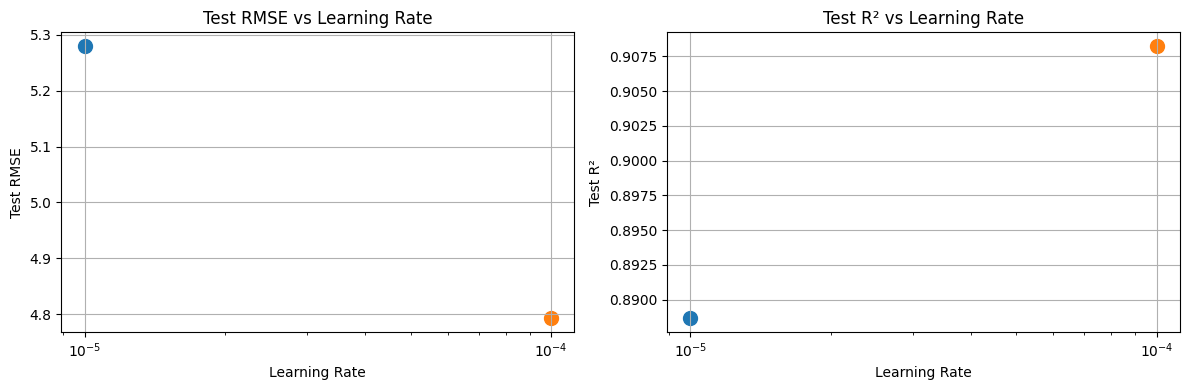

In [274]:
# To-Do 11: Experiment with different learning rates
print(" Experimenting with Learning Rates \n")

learning_rates = [0.00001, 0.0001, 0.001, 0.01]
results = {}

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")

    # Reinitialize weights
    W_initial = np.zeros((X_train.shape[0], 1))

    # Train with this learning rate
    W_opt, cost_hist = gradient_descent(
        X_train, Y_train, W_initial, lr, iterations=1000
    )

    # Make predictions
    Y_pred_test = (W_opt.T @ X_test).T
    Y_pred_train = (W_opt.T @ X_train).T

    # Calculate metrics
    train_rmse = rmse(Y_train, Y_pred_train)
    test_rmse = rmse(Y_test, Y_pred_test)
    train_r2 = r2(Y_train, Y_pred_train)
    test_r2 = r2(Y_test, Y_pred_test)

    # Store results
    results[lr] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'final_cost': cost_hist[-1]
    }

    print(f"  Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
    print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print(f"  Final cost: {cost_hist[-1]:.4f}")

# Analyze performance
print("\n" + "-"*50)
print("ANALYSIS")
print("-"*50)

# Check for overfitting/underfitting
print("\n1. Model Performance Analysis:")
best_lr = min(results, key=lambda x: results[x]['test_rmse'])
print(f"Best learning rate: {best_lr} (lowest test RMSE)")

# Check overfitting
print("\n2. Overfitting Check:")
for lr in learning_rates:
    diff = results[lr]['train_rmse'] - results[lr]['test_rmse']
    if diff < 0:  # Train RMSE < Test RMSE
        print(f"  LR={lr}: Slight overfitting (train better than test)")
    elif abs(diff) < 0.5:
        print(f"  LR={lr}: Good generalization")
    else:
        print(f"  LR={lr}: Underfitting (both high)")

print("\n3. Recommendations:")
print("- If train error << test error: Reduce model complexity or add regularization")
print("- If both errors high: Increase iterations, try higher learning rate, or add features")
print("- If R² close to 1: Good fit")
print("- If R² negative: Model worse than predicting mean")

# Plot comparison
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.scatter(lr, results[lr]['test_rmse'], label=f'LR={lr}', s=100)
plt.title('Test RMSE vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Test RMSE')
plt.xscale('log')
plt.grid(True)

plt.subplot(1, 2, 2)
for lr in learning_rates:
    plt.scatter(lr, results[lr]['test_r2'], label=f'LR={lr}', s=100)
plt.title('Test R² vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Test R²')
plt.xscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()